In [22]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Step 3: importing Data
email_df =pd.read_csv('/content/drive/MyDrive/OASIS/spam.csv', encoding = "ISO-8859-1")

In [25]:
email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
# Step 3: Data Preprocessing

email_df.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [27]:
#shape of data five
email_df.shape

(5572, 5)

In [28]:
#columns
email_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [29]:
# Removing unwanted columns
email_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1) # removing unwanted columns



In [30]:
# Remaning columns
email_df.rename(columns={'v1': 'Category', 'v2' :'Message '}, inplace=True)

In [31]:
# Label encoder
email_df.loc[email_df['Category' ]=='spam', 'category',]=0  #label encoding
email_df.loc[email_df['Category' ]=='ham', 'category',]=1

In [32]:
# Removing extra caregory columns
email_df.drop('Category', inplace=True, axis=1)


In [33]:
#print five lines in dataset
email_df.head()

,Message,category
0,"Go until jurong point, crazy.. Available only ...",1.0
1,Ok lar... Joking wif u oni...,1.0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,U dun say so early hor... U c already then say...,1.0
4,"Nah I don't think he goes to usf, he lives aro...",1.0


In [34]:
# Step 3: Split the Data
x=email_df['Message ']    #sorting values in x and y
y=email_df['category']

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=20)


print(x.shape)  #shapes of X_train,X_test,Y_train,Y_test
print(y.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(5572,)
(4457,)
(1115,)


In [35]:
# Step 4: Feature Extraction

#tranform the test data into feature vectors that can be used as input to the Logistic regression
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english', lowercase=True)
feature_extraction


TfidfVectorizer(stop_words='english')

In [36]:
X_train_features=feature_extraction.fit_transform(X_train)   #model fiting
X_test_features=feature_extraction.transform(X_test)

Y_test=Y_test.astype('int')  #changing values of test data from object to integer
Y_train=Y_train.astype('int')

In [37]:
# Step 5: Choose a Model
model=LogisticRegression()



In [38]:
# Step 6: Train the Model
model=LogisticRegression()
model.fit(X_train_features,Y_train)



LogisticRegression()

In [39]:
# Step 7: Evaluate the Model
# Accuracy on train data
Model_predict= model.predict(X_train_features)
accuracy=accuracy_score(Y_train, Model_predict)

print('Accuracy on training data: ', accuracy*100) # accuracy on train data


# Accuracy on test data
Model_predict_test= model.predict(X_test_features)
accuracy2=accuracy_score(Y_test, Model_predict_test)

print('Accuracy on test data: ', accuracy2*100) # accuracy on test data




Accuracy on training data:  96.7915638321741
Accuracy on test data:  96.05381165919282


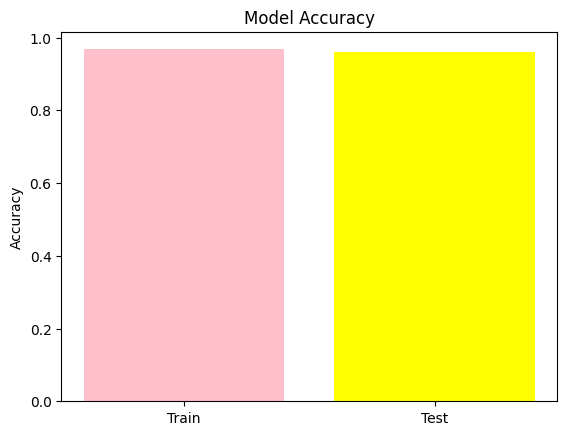

In [40]:
# step 8: Visuization

plt.bar(["Train", "Test"], [accuracy, accuracy2], color=['pink', 'yellow'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()



In [41]:
# Step 9: Prediction

input_mail=["Nah I don't think he goes to usf, he lives around here though"]
feature_ext=feature_extraction.transform(input_mail)
predict_mail= model.predict(feature_ext)
print(predict_mail)

if predict_mail[0]==1:
  print ('ham')
if predict_mail[0]==0:
  print ('spam')

[1]
ham


In [42]:
# Step 9: Prediction

input_mail=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
feature_ext=feature_extraction.transform(input_mail)
predict_mail= model.predict(feature_ext)
print(predict_mail)

if predict_mail[0]==1:
  print ('ham')
if predict_mail[0]==0:
  print ('spam')


[0]
spam
